# BY : Mohammad Aamir Rangrez 

# Task: From the given 'IRIS' Dataset predct the ptimal number of clusters and represents it visually 

# 1. Setup the enviroment 

importing module pandas , number , for data manuplation, matplotlib, seaborn module for Data Visualisation.

sklearn for modelling

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
import sklearn.metrics as metrics

from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# 2 .Importing Data

In [2]:
ris = pd.read_csv('C:\\Users\\rangadi MD aamir\\spark Foundation task\\task 2 Pediction using UnSuper ML\\Iris.csv')

In [3]:
print(ris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
print('Data shape -->', ris .shape)

Data shape --> (150, 6)


In [5]:
ris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# 3. Data preprocessing 

In [6]:
data = ris.drop(['Species'],axis =1)
y = ris['Species']

# i)Missing Value

find missing value in data set

In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

# ii) Data Visualisation

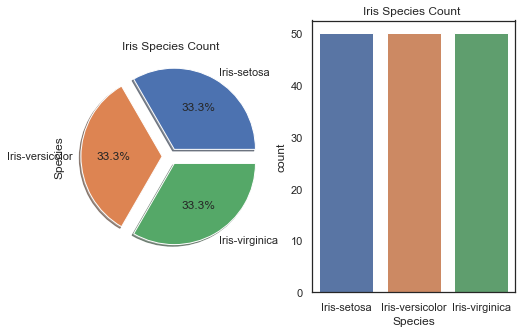

In [8]:
f, ax = plt.subplots(1,2,figsize=(8,5))
ris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris Species Count')
sns.countplot('Species',data=ris,ax=ax[1])
ax[1].set_title('Iris Species Count ')
plt.show()

We can see that there are 50 samples each of all the Iris Species in the data set 

# FacetGrid Plot

plotting species for sepal 

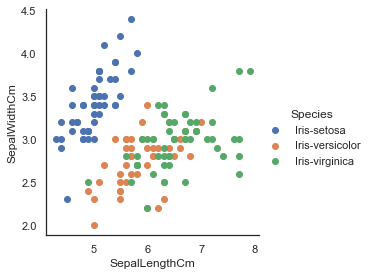

In [9]:
sns.FacetGrid(ris, hue="Species", size = 4) \
    .map(plt.scatter, "SepalLengthCm","SepalWidthCm") \
    .add_legend();

plotting species for petal

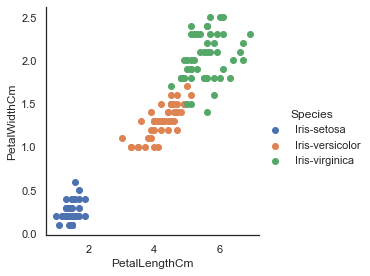

In [10]:
sns.FacetGrid(ris, hue="Species", size=4) \
    .map(plt.scatter, "PetalLengthCm","PetalWidthCm") \
    .add_legend();

# Boxplot

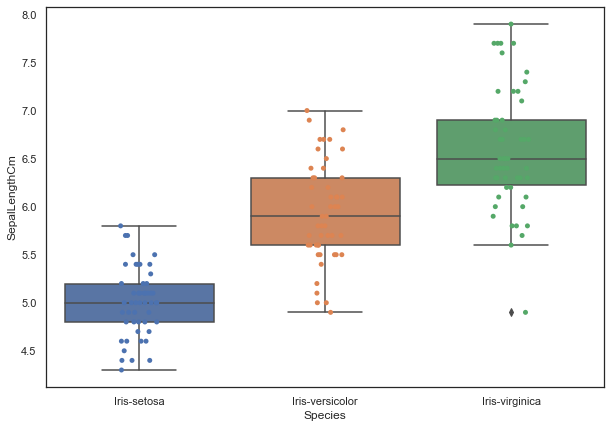

In [11]:
fig = plt.gcf()
fig.set_size_inches(10,7)
fig= sns.boxplot(x='Species',y='SepalLengthCm',data=ris)
fig= sns.stripplot(x = 'Species', y='SepalLengthCm',data=ris,jitter=True,edgecolor='gray')

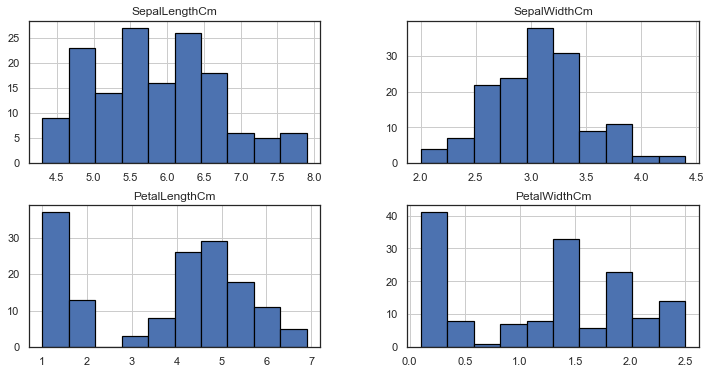

In [12]:
tmp = ris.drop('Id', axis=1)
tmp.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

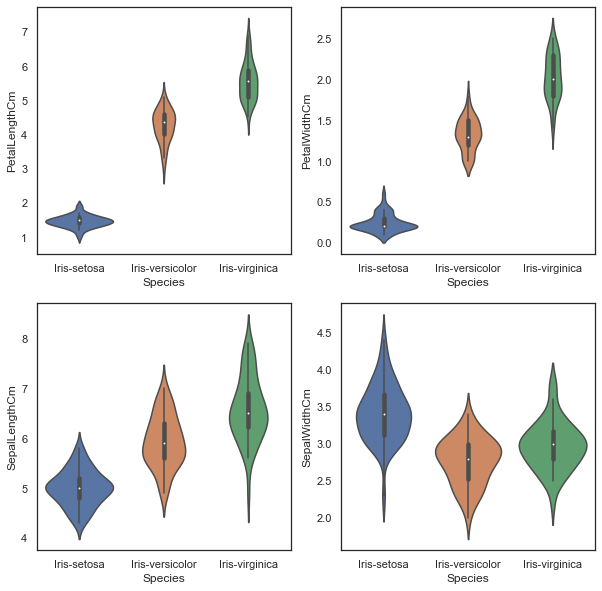

In [13]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=ris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=ris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=ris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=ris)

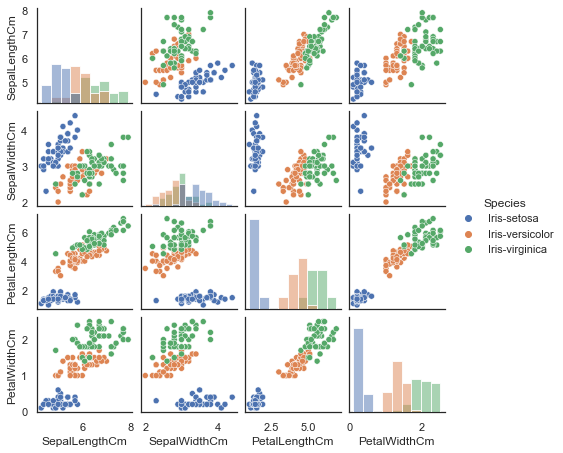

In [14]:
sns.pairplot(tmp, hue="Species",diag_kind='hist', size=1.6);

# Convert Species to Numeric

In [15]:
def y_label (invalue):
    if invalue == 'ris-setosa':
        return 1
    elif invalue == 'ris-setosa':
        return 0
    else :
        return 2
df1 = pd.DataFrame(data=y.values, columns=['species'])

df1['index'] = df1['species'].apply(y_label)
        

# 4 Data Preparation

The dat awe are using to buils a clustring should 
    1. Always be numeric and 
    2. should always be on same scale 

# i) Data Type

In [16]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

# ii) Scalling the data

In [17]:
std_scale = StandardScaler().fit(data)
data_scaled = std_scale.transform(data)

x_scaled = pd.DataFrame(data_scaled, columns = data.columns)
x_scaled.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
119,1.027706,0.189830,-1.976181,0.705893,0.396172
139,1.489597,1.280340,0.106445,0.933356,1.185010
95,0.473438,-0.173674,-0.124958,0.250967,0.001753
104,0.681288,0.795669,-0.124958,1.160819,1.316483


so before we feed a data to a clustring algorithm it becomes impreative to bring our data on the same scale by using StandardScaler

# K - Means Algorith 

1) Scaller Plot to visualise the scaled data and initial centriods for give k-cluster 

In [18]:
def plot_kmeans_scale(k) :
  
    kmeans_model = KMeans(n_clusters=k, random_state=123)
    kmeans_model.fit(data_scaled)
    #Make predictions
    labels=kmeans_model.predict(data_scaled)
    #to get centroids
    centroid=kmeans_model.cluster_centers_
    colors=['r','g','p','b','o','y','m','w']
    fig = plt.figure(1, figsize=(3,3))
    kx = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=120)
    for i in range(k) :
        points=np.array([data_scaled[j]for j in range(len(data_scaled))if labels[j]>=i])
        kx.scatter(points[:, 3], points[:, 0], points[:, 2],s=5, cmap='jet')#colors[i]) 
        kx.scatter(centroid[:,0],centroid[:,1],marker='*',s=200,c='red')
      
        #plt.title('Number of clusters = {}'.format(k))
        plt.show()


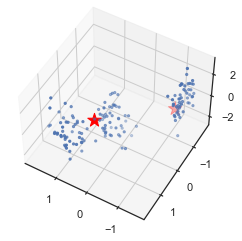

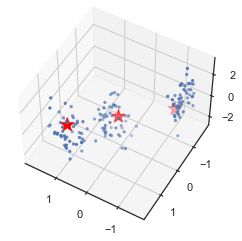

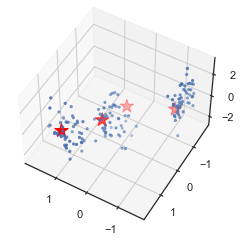

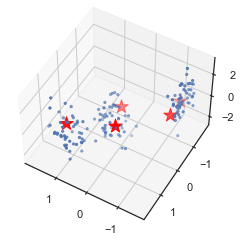

In [19]:
k = 5
for i in range(k+1):
    if i>1:
        plot_kmeans_scale(i)

# (ii) Finding optimal number of clusters-Plo scree pot/Elbow plot

Text(3.1, 5001, 'optimal number of clusters = 3')

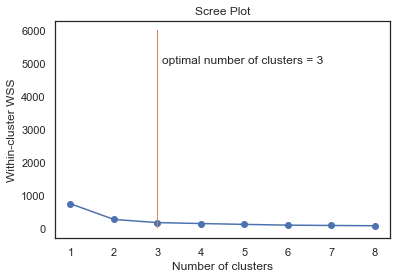

In [20]:
k = 9
WSS = []
for k in range(1,9):
        kmeans_model = KMeans(n_clusters=k, random_state=123)
        kmeans_model.fit(data_scaled)
        WSS.append(kmeans_model.inertia_)
plt.plot(range(1,9), WSS, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster WSS")
plt.title("Scree Plot")
plt.plot([3]*6000, range(1,6001), ",")
plt.text(3.1, 5001, "optimal number of clusters = 3")

In [21]:
for  i in range(2,8):
    labels = KMeans(n_clusters=i, random_state=123).fit(data_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(data_scaled,labels,metric="euclidean",random_state=123)))

Silhoutte score for k= 2 is 0.570815210603504
Silhoutte score for k= 3 is 0.452949780355554
Silhoutte score for k= 4 is 0.3911646146569221
Silhoutte score for k= 5 is 0.3290872528629286
Silhoutte score for k= 6 is 0.3275372800058476
Silhoutte score for k= 7 is 0.33173863519557206


    The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters (separation). The value of this messure range from -1 to 1 and higher the value indicates maximum similarity in its own cluster.
    


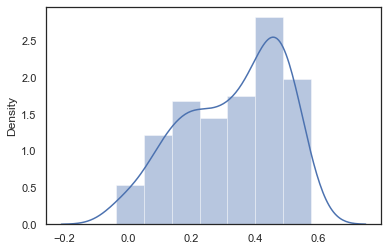

In [22]:
scores = metrics.silhouette_samples(data_scaled, labels)
sns.distplot(scores);

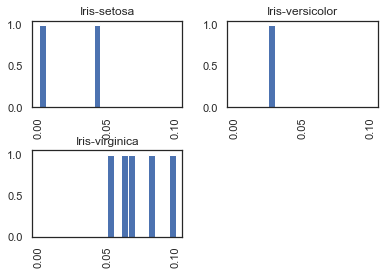

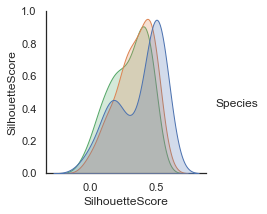

In [23]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = ris['Species']
df_scores.hist(by= 'Species',column = 'SilhouetteScore',range=(0,0.1), bins=20);
sns.pairplot(df_scores, hue="Species", size=3);

# iii) K-means Clustring with 3 optimal Clusters

In [24]:
km = KMeans(n_clusters=3, random_state=123)
km.fit(data_scaled)
print('inertia with clusers=3 -->',km.inertia_)
km.cluster_centers_

inertia with clusers=3 --> 177.05608895062977


array([[ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]])

# (iv)Make prediction on the labels using K=3

In [25]:
predicted_cluster = km.predict(data_scaled)
predicted_labels = km.labels_

# v) Plot the Scled Data partitioned into optimal cluster K=3

Text(0.5, 0.92, 'K Means')

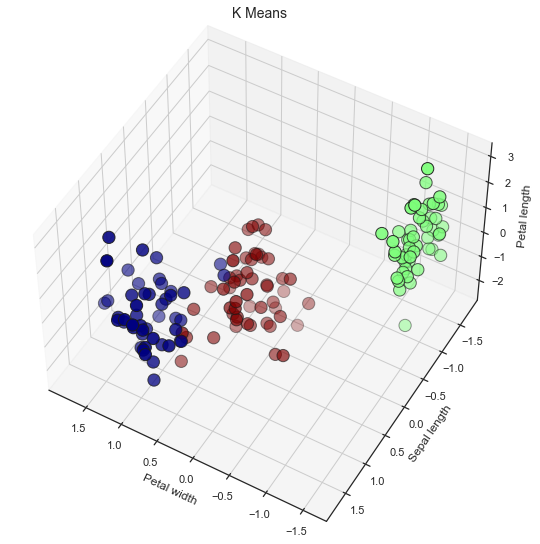

In [26]:
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=120)
ax.scatter(data_scaled[:, 3], data_scaled[:, 0], data_scaled[:, 2],
          c=predicted_labels.astype(np.float), cmap='jet',edgecolor="k", s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

# (vi) Comparing Clustered data with original data for defining boundaries of 3 clusters(k-means)

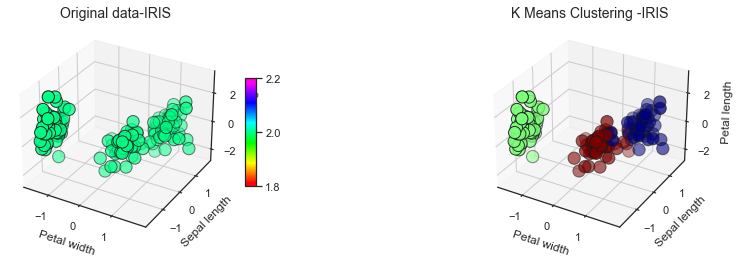

In [27]:
from matplotlib import cm

fig = plt.figure(figsize=plt.figaspect(0.25))
ax = fig.add_subplot(1, 2, 1, projection='3d')

surf =ax.scatter(data_scaled[:, 3], data_scaled[:, 0],data_scaled[:, 2],
          c=df1['index'],  cmap='gist_rainbow',edgecolor="k", s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")

plt.title("Original data-IRIS", fontsize=14)

fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.scatter(data_scaled[:, 3], data_scaled[:, 0], data_scaled[:, 2],
           c=predicted_labels.astype(np.float), cmap='jet',edgecolor='k', s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means Clustering -IRIS", fontsize=14)
plt.show()


# (vi) Create cluster profiles compare with Original Data labels

In [28]:
def predict_species (invalue):
    if invalue == 1:
        return 'Iris-setosa' 
    elif invalue == 0 :
        return 'Iris-virginica'
    else :
        return 'Iris-versicolor'
df1['predict_label']= pd.DataFrame(data=predicted_labels, columns=['predict_label'])

df1['predict_species']=df1['predict_label'].apply(predict_species) 


In [29]:
sum(np.where(df1['species']!=df1['predict_species'],1,0))

7

In [30]:
df1[df1['species']!=df1['predict_species']]

,species,index,predict_label,predict_species
77,Iris-versicolor,2,0,Iris-virginica
86,Iris-versicolor,2,0,Iris-virginica
101,Iris-virginica,2,2,Iris-versicolor
106,Iris-virginica,2,2,Iris-versicolor
113,Iris-virginica,2,2,Iris-versicolor
119,Iris-virginica,2,2,Iris-versicolor
121,Iris-virginica,2,2,Iris-versicolor


By K-means clustering with number of clusters=3 , we are able to cluster 143 species correctly out of 150 species.The cluster Iris-versicolor and Iris-virginica are misclustered.